# Who are the leading employers for data professionals in India?

### Methodology
1. Count of Jobs For Companies
2. Calculate Median Salary for Companies
3. Plotting the Companies on Bar Plot


## Importing Data and Libraries

In [1]:
#importing essential Modules and Libarires
import ast
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns


#loading Data

df=load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

c:\Users\Rahul Bhardwaj\anaconda3\envs\plearn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 1.0, 'Number of Jobs for Data Analyst in Top Companies Across India')

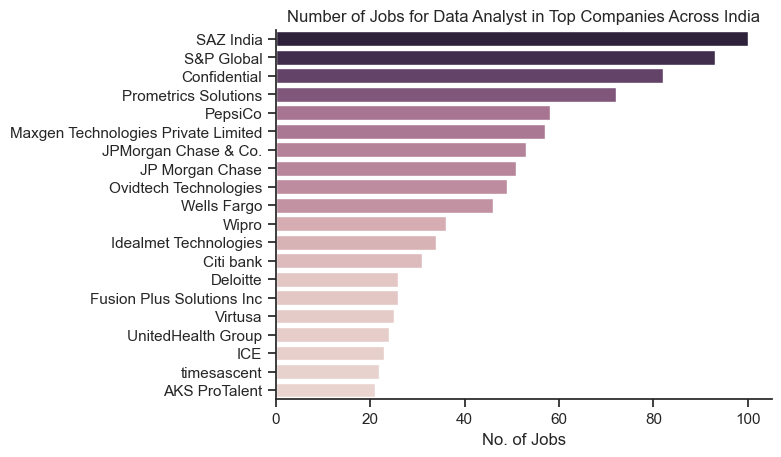

In [3]:
selected_country = 'India'
selected_title = 'Data Analyst'
df_sel=df[(df['job_title_short']==selected_title) & (df['job_country']==selected_country)]
df_plot1=df_sel['company_name'].value_counts().head(20).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot1,x='count',y='company_name',hue='count',legend=False)
sns.despine()
plt.xlabel("No. of Jobs")
plt.ylabel("")
plt.title(f"Number of Jobs for {selected_title} in Top Companies Across {selected_country}")

### Plotting for Median Salaries

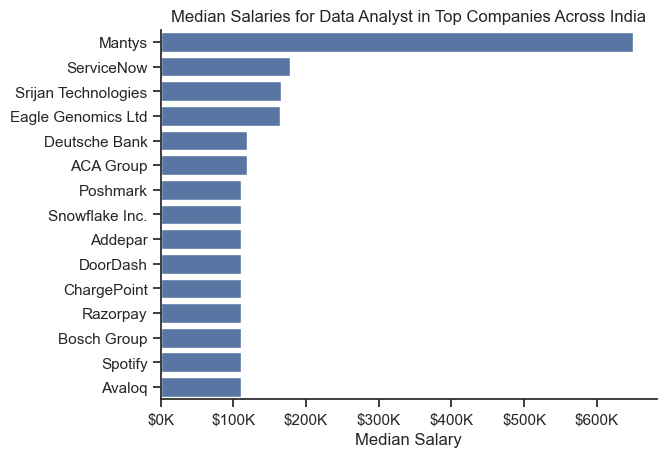

In [20]:
df_plot=df_sel.dropna(subset='salary_year_avg')
df_plot=df_plot.groupby('company_name')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(15)
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='median',y='company_name')
sns.despine()
plt.xlabel("Median Salary")
plt.ylabel("")
plt.title(f"Median Salaries for {selected_title} in Top Companies Across {selected_country}")

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# plt.show()